## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [17]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

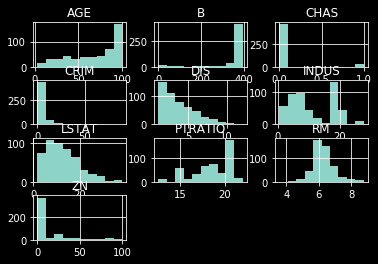

In [18]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
for col in boston_features:
    if col.startswith('RAD') or col.startswith('TAX'):
        boston_features.drop(columns=[col], inplace=True)
boston_features.hist();

## Perform log transformations for the variables where it makes sense

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

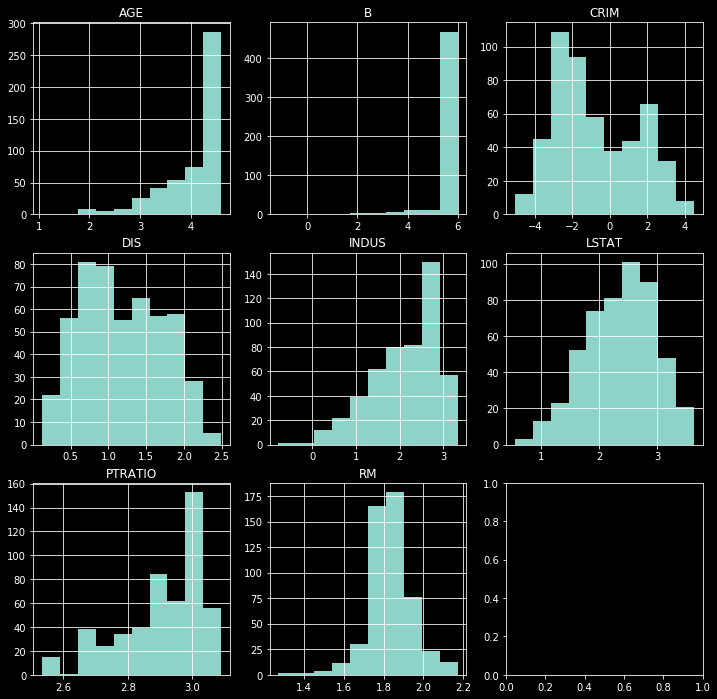

In [20]:
import numpy as np

df = pd.DataFrame([])

for col in boston_features:
    if col != 'CHAS':
        df[col] = boston_features[col].map(lambda x: np.log(x))

df.hist(figsize=(12,12));

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [ ]:
# Your code here
# The variables that were positively skewed (CRIM, DIST, LSTAT) have been improved,
# those that were negatively skewed (AGE, INDUS, PTRATIO) have become more negatively skewed.
# RM went from looking relatively normal to being negatively skewed
# The problem with the ZN variable is that it has zeros which return an undefined value when the
# log is taken

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

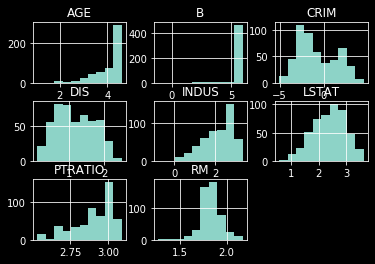

In [24]:
#df = df.drop(columns=['ZN'])
df.hist();

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

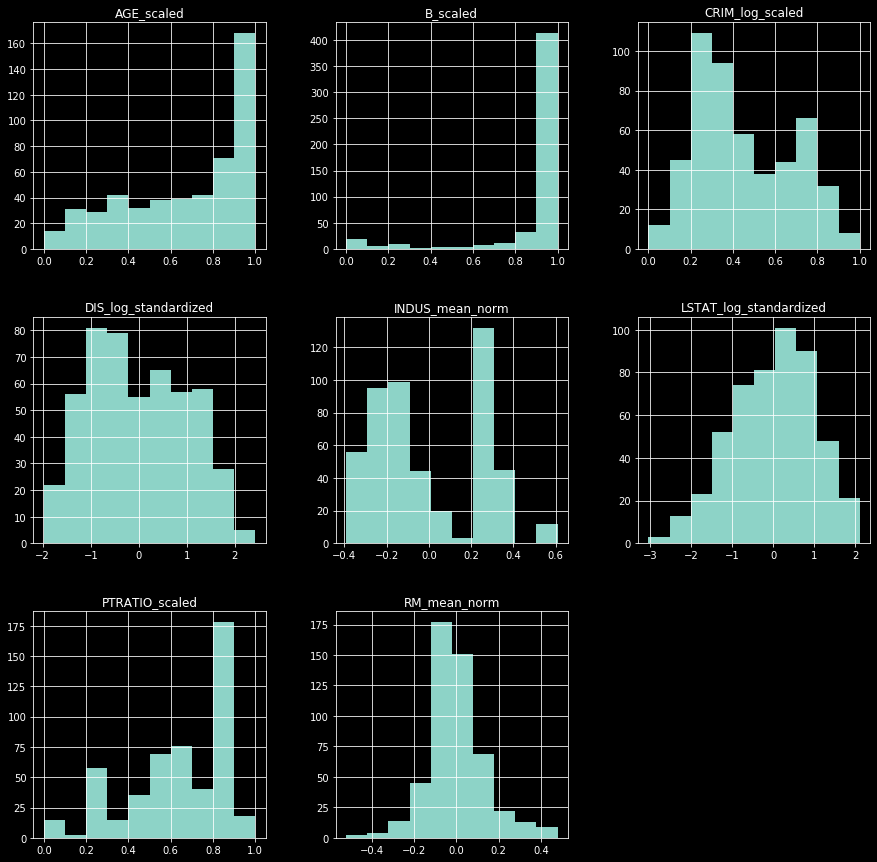

In [37]:
features_final = pd.DataFrame([])

def minmax(x, col, data):
    return (x - data[col].min())/(data[col].max()-data[col].min())

def standardize(x,col,data):
    return (x-data[col].mean())/data[col].std()

def mean_norm(x,col,data):
    return (x-data[col].mean())/(data[col].max()-data[col].min())

features_final['AGE_scaled'] = boston_features.AGE.map(lambda x: minmax(x,'AGE',boston_features))
features_final['B_scaled'] = boston_features.B.map(lambda x: minmax(x,'B',boston_features))
features_final['CRIM_log_scaled'] = df.CRIM.map(lambda x: minmax(x,'CRIM',df))
features_final['DIS_log_standardized'] = df.DIS.map(lambda x: standardize(x,'DIS',df))
features_final['INDUS_mean_norm'] = boston_features.INDUS.map(lambda x: mean_norm(x,'INDUS',boston_features))
features_final['LSTAT_log_standardized'] = df.LSTAT.map(lambda x: standardize(x,'LSTAT',df))
features_final['PTRATIO_scaled'] = boston_features.PTRATIO.map(lambda x: minmax(x,'PTRATIO',boston_features))
features_final['RM_mean_norm'] = boston_features.RM.map(lambda x: mean_norm(x,'RM',boston_features))

features_final.hist(figsize=(15,15));

In [41]:
print(features_final['DIS_log_standardized'].mean())
print(features_final['DIS_log_standardized'].std())
print(features_final['INDUS_mean_norm'].mean())

-2.8084693113047436e-17
0.9999999999999999
5.616938622609487e-17


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.